In [168]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt


In [171]:
class ArtificialNeuron:
    def __init__(self, n_iterations=100, learning_rate=0.01):
        """
        Artificial Neuron Implementation for Binary Classification.

        """
        self.n_iter = n_iterations
        self.learning_rate = learning_rate
        self.acc = []

    def fit(self, X, y):
        """
        Note:
        - The artificial neuron uses the sigmoid activation function for binary classification.
        """



        # Adding bias term to the input features
        X = np.hstack((X, np.ones((X.shape[0], 1))))

        # Randomly initialize the weights
        self.W = np.random.randn(X.shape[1], 1)

        # Precompute constant factor for the gradient update
        self.C = np.divide(1, y.size)

        # Training loop
        for _ in range(self.n_iter):
            # Compute the output scores (Z) and apply the sigmoid activation function
            self.Z = X.dot(self.W)
            self.a = np.divide(1, 1 + np.exp(-self.Z))

            # Compute gradients and update weights using gradient descent
            grads = self.C * X.T.dot(np.subtract(self.a, y))
            self.W = np.subtract(self.W, self.learning_rate * grads)

            # Compute the log-likelihood loss and store it for monitoring convergence
            self.LL = np.multiply(-self.C, np.sum(np.multiply(y, np.log(self.a)) + np.multiply((1 - y), np.log(1 - self.a))))
            self.acc.append(self.LL)

        # Returning the trained weights
        return self.W

## Dataset

In [162]:
X,y = make_blobs(n_samples=200,n_features=2,centers=2)

## Dataset visualization

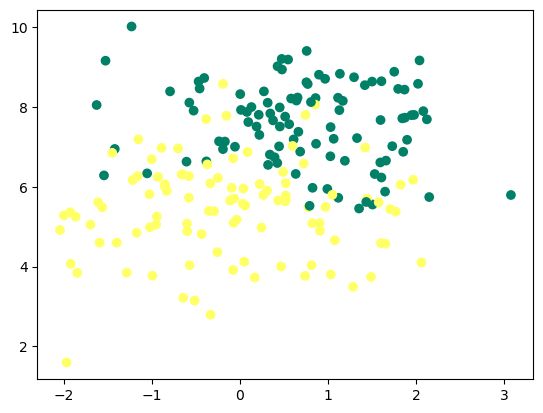

In [207]:
plt.scatter(X[:,0],X[:,1],c=y,cmap="summer")


In [208]:
# to avoid broadcasting
y = y.reshape((200,1))

In [210]:
neuron = ArtificialNeuron(n_iterations=5000,learning_rate = 0.1)
weights = neuron.fit(X,y)

In [211]:
X0 = np.linspace(-3,3,100)
X1 = -(weights[0]*X0 + weights[2]) / weights[1]

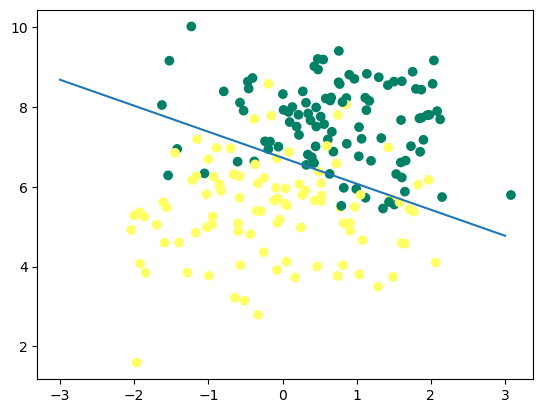

In [212]:
plt.scatter(X[:,0],X[:,1],c=y,cmap="summer")
plt.plot(X0,X1)


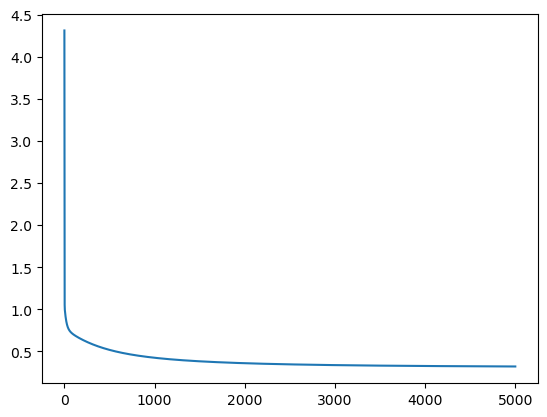

In [214]:
plt.plot(neuron.acc)